<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/main/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set(style='darkgrid')
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})


import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/sensor_ml.csv", index_col="id")
# sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [3]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,0,0,0,0,2022-11-03 16:14:12.157378
2,0,0,0,0,2022-11-03 16:14:12.210690
3,0,0,0,0,2022-11-03 16:14:12.258831
4,0,0,0,0,2022-11-03 16:14:12.325402
5,0,0,0,0,2022-11-03 16:14:12.375275
...,...,...,...,...,...
2356,1,1,0,0,2022-11-03 16:16:52.656468
2357,1,1,0,0,2022-11-03 16:16:52.706635
2358,1,1,0,0,2022-11-03 16:16:52.810039


In [ ]:
pd.__version__

'1.3.5'

In [4]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at                  chan_1
2022-11-03 16:14:12.157378  0         1
2022-11-03 16:14:12.210690  0         1
2022-11-03 16:14:12.258831  0         1
2022-11-03 16:14:12.325402  0         1
2022-11-03 16:14:12.375275  0         1
                                     ..
2022-11-03 16:16:52.656468  1         1
2022-11-03 16:16:52.706635  1         1
2022-11-03 16:16:52.810039  1         1
2022-11-03 16:16:52.890114  1         1
2022-11-03 16:16:52.974780  1         1
Name: chan_1, Length: 2360, dtype: int64

In [5]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at                  chan_2
2022-11-03 16:14:12.157378  0         1
2022-11-03 16:14:12.210690  0         1
2022-11-03 16:14:12.258831  0         1
2022-11-03 16:14:12.325402  0         1
2022-11-03 16:14:12.375275  0         1
                                     ..
2022-11-03 16:16:52.656468  1         1
2022-11-03 16:16:52.706635  1         1
2022-11-03 16:16:52.810039  1         1
2022-11-03 16:16:52.890114  1         1
2022-11-03 16:16:52.974780  1         1
Name: chan_2, Length: 2360, dtype: int64

In [6]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at                  chan_3
2022-11-03 16:14:12.157378  0         1
2022-11-03 16:14:12.210690  0         1
2022-11-03 16:14:12.258831  0         1
2022-11-03 16:14:12.325402  0         1
2022-11-03 16:14:12.375275  0         1
                                     ..
2022-11-03 16:16:52.656468  0         1
2022-11-03 16:16:52.706635  0         1
2022-11-03 16:16:52.810039  0         1
2022-11-03 16:16:52.890114  0         1
2022-11-03 16:16:52.974780  0         1
Name: chan_3, Length: 2360, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at                  chan_4
2022-11-03 16:14:12.157378  0         1
2022-11-03 16:14:12.210690  0         1
2022-11-03 16:14:12.258831  0         1
2022-11-03 16:14:12.325402  0         1
2022-11-03 16:14:12.375275  0         1
                                     ..
2022-11-03 16:16:52.656468  0         1
2022-11-03 16:16:52.706635  0         1
2022-11-03 16:16:52.810039  0         1
2022-11-03 16:16:52.890114  0         1
2022-11-03 16:16:52.974780  0         1
Name: chan_4, Length: 2360, dtype: int64

In [8]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [9]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-03 16:14:12.157378,0,0,0,0
2022-11-03 16:14:12.210690,0,0,0,0
2022-11-03 16:14:12.258831,0,0,0,0
2022-11-03 16:14:12.325402,0,0,0,0
2022-11-03 16:14:12.375275,0,0,0,0
...,...,...,...,...
2022-11-03 16:16:52.656468,1,1,0,0
2022-11-03 16:16:52.706635,1,1,0,0
2022-11-03 16:16:52.810039,1,1,0,0


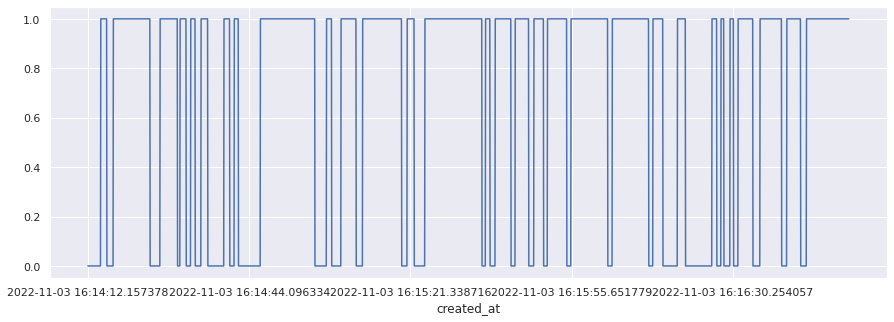

In [10]:
sensor_copy_df["chan_1"].plot()

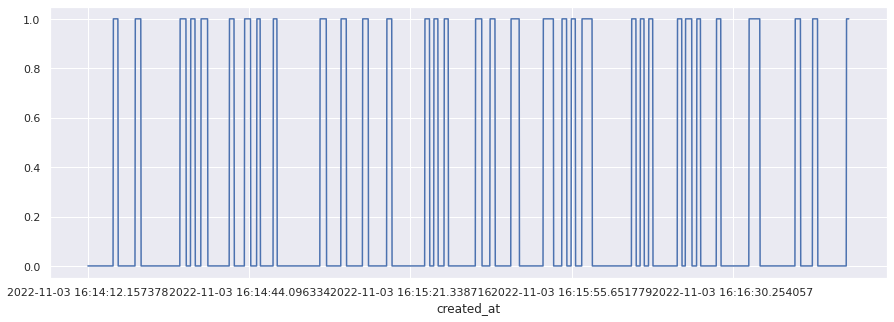

In [11]:
sensor_copy_df["chan_2"].plot()

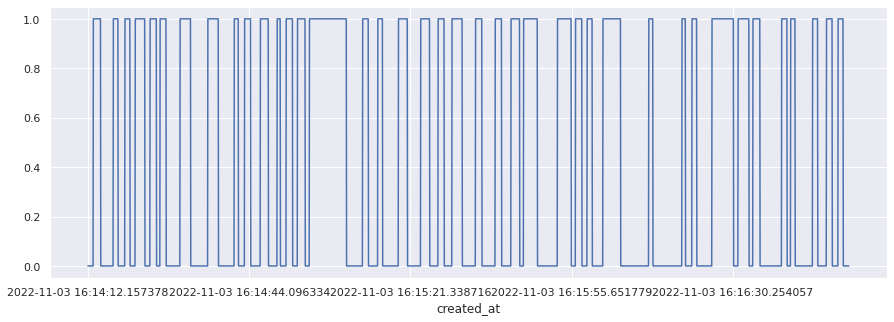

In [12]:
sensor_copy_df["chan_3"].plot()

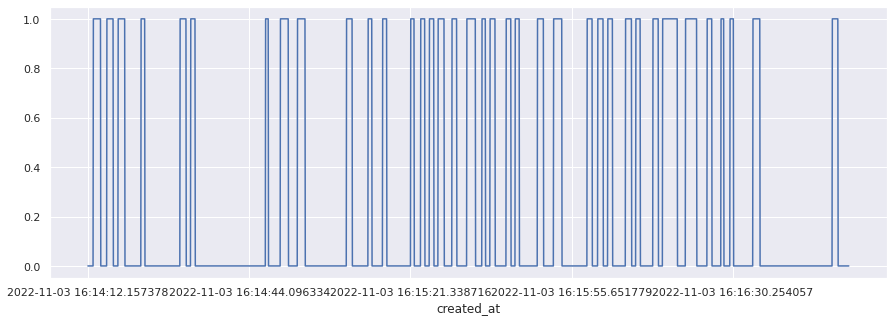

In [13]:
sensor_copy_df["chan_4"].plot()

In [14]:
def df_to_X_y(df, window_size=10):
  X = []
  y = []
  for i in range(df.shape[0]-window_size):
    X.append([r for r in df.to_numpy()[i:window_size+i]])
    y.append(df.to_numpy()[window_size+i])
  return np.array(X), np.array(y)

In [15]:
X, y =df_to_X_y(sensor_copy_df)
X.shape, y.shape

((2350, 10, 4), (2350, 4))

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Build the model 🧠

In [17]:
def build_model(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(4, activation="sigmoid")
  ])

In [18]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(940, 10, 4) (940, 4)
(705, 10, 4) (705, 4)
(705, 10, 4) (705, 4)


In [19]:
model = build_model((X.shape[1], X.shape[2]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 45)            9000      
                                                                 
 dropout (Dropout)           (None, 10, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 45)                16380     
                                                                 
 dense (Dense)               (None, 8)                 368       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 25,784
Trainable params: 25,784
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=BinaryAccuracy())

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_data=(X_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 6s 47ms/step - loss: 0.6367 - binary_accuracy: 0.6676 - val_loss: 0.5753 - val_binary_accuracy: 0.7043
Epoch 2/50
32/32 [==============================] - 1s 18ms/step - loss: 0.5183 - binary_accuracy: 0.7782 - val_loss: 0.4955 - val_binary_accuracy: 0.7887
Epoch 3/50
32/32 [==============================] - 1s 19ms/step - loss: 0.4495 - binary_accuracy: 0.8101 - val_loss: 0.4433 - val_binary_accuracy: 0.8174
Epoch 4/50
32/32 [==============================] - 1s 16ms/step - loss: 0.3963 - binary_accuracy: 0.8415 - val_loss: 0.3985 - val_binary_accuracy: 0.8387
Epoch 5/50
32/32 [==============================] - 0s 15ms/step - loss: 0.3508 - binary_accuracy: 0.8713 - val_loss: 0.3640 - val_binary_accuracy: 0.8624
Epoch 6/50
32/32 [==============================] - 1s 17ms/step - loss: 0.3208 - binary_accuracy: 0.8888 - val_loss: 0.3191 - val_binary_accuracy: 0.8819
Epoch 7/50
32/32 [==============================] - 1s 16ms/step - los

Text(0, 0.5, 'accuracy')

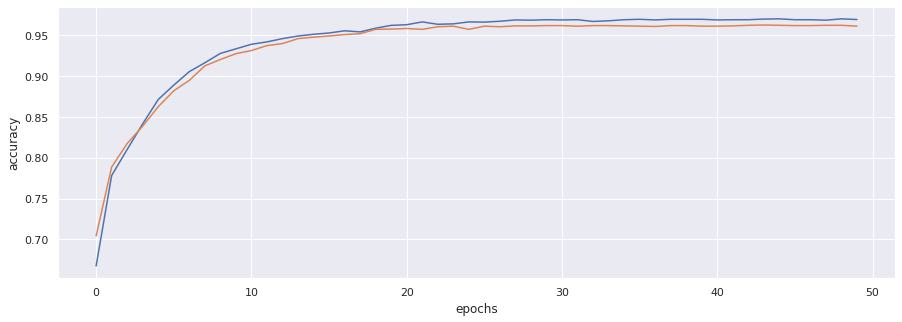

In [22]:
plt.plot(history.history["binary_accuracy"], label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"], label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

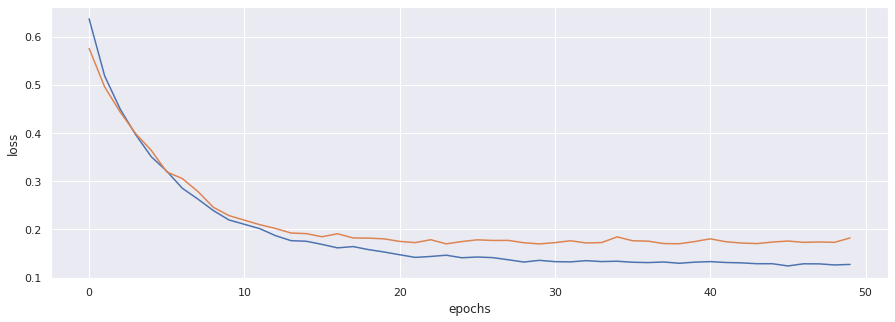

In [23]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

In [24]:
test_predictions = (model.predict(X_test)>0.5).astype(int)
test_predictions 

23/23 [==============================] - 1s 5ms/step


array([[1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 0]])

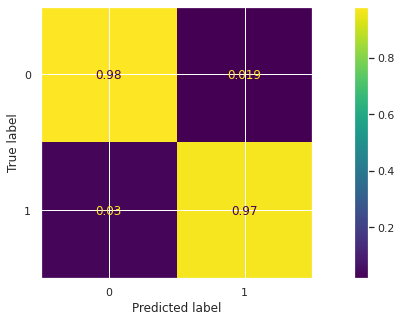

In [25]:
cm = metrics.confusion_matrix(y_test.flatten(), test_predictions.flatten(), normalize="true")
display_cm = metrics.ConfusionMatrixDisplay(cm)
display_cm.plot()

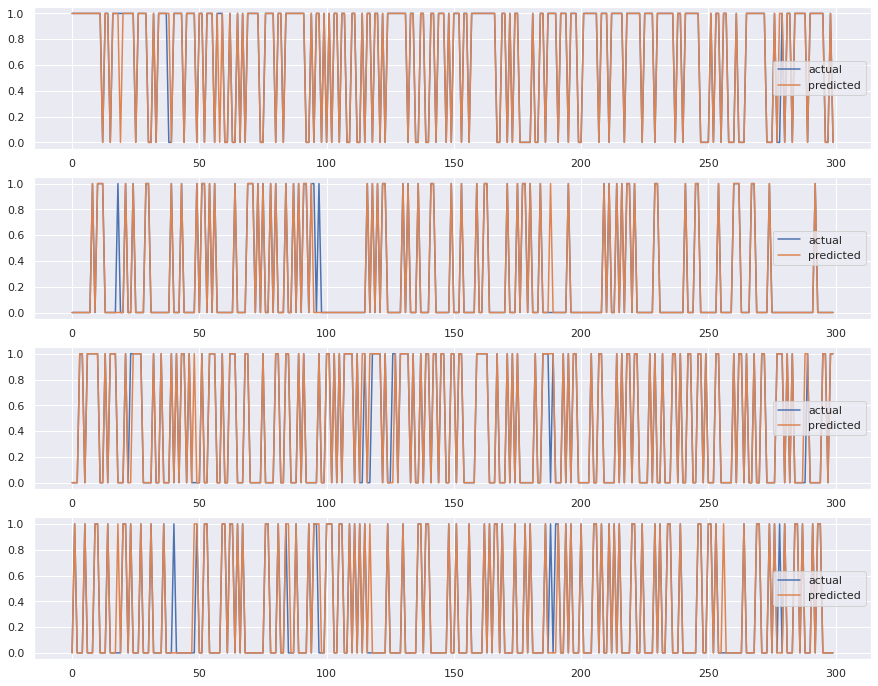

In [26]:
nchannels = y.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y_test[:300, i], label="actual")
  ax[i].plot(test_predictions[:300, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [27]:
def save_model(model, filename="model.tflite"):
  # convert the keras model to tflite
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
  ]

  tflite_model = converter.convert()

  # save the tflite model
  with open(filename, "wb") as f:
    f.write(tflite_model)

In [ ]:
tf.__version__

'2.9.2'

In [28]:
save_model(model)

Hypothesis 🤔: Can my model predict the idle time for a channel?

In [29]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        # print(i, bit)
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
            else:
                # 1,1
                continue
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))

    return np.array(idle_times)

In [30]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if len(j) > 0 and i+j[0][0] <= i else 0 
                       for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [31]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-03 16:14:12.157378,40,79,17,17
2022-11-03 16:14:12.210690,39,78,16,16
2022-11-03 16:14:12.258831,38,77,15,15
2022-11-03 16:14:12.325402,37,76,14,14
2022-11-03 16:14:12.375275,36,75,13,13
...,...,...,...,...
2022-11-03 16:16:52.656468,0,0,5,5
2022-11-03 16:16:52.706635,0,0,4,4
2022-11-03 16:16:52.810039,0,0,3,3


In [32]:
X2, y2 = df_to_X_y(idle_times_df)
X2.shape, y2.shape

((2350, 10, 4), (2350, 4))

In [33]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.6)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((940, 10, 4), (705, 10, 4), (705, 10, 4))

In [34]:
def build_model2(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu")
  ])

In [35]:
model2 = build_model2((X2.shape[1], X2.shape[2]))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 45)            9000      
                                                                 
 dropout_1 (Dropout)         (None, 10, 45)            0         
                                                                 
 lstm_3 (LSTM)               (None, 45)                16380     
                                                                 
 dropout_2 (Dropout)         (None, 45)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                736       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 26,184
Trainable params: 26,184
Non-trai

In [36]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [37]:
history2 = model2.fit(X2_train, y2_train, batch_size=30, epochs=40, validation_data=(X2_val, y2_val))

Epoch 1/40
32/32 [==============================] - 9s 45ms/step - loss: 1534.0923 - accuracy: 0.5553 - val_loss: 1471.6188 - val_accuracy: 0.6525
Epoch 2/40
32/32 [==============================] - 0s 15ms/step - loss: 1385.0377 - accuracy: 0.5649 - val_loss: 1281.9132 - val_accuracy: 0.6128
Epoch 3/40
32/32 [==============================] - 0s 15ms/step - loss: 1199.7439 - accuracy: 0.5787 - val_loss: 1110.3275 - val_accuracy: 0.6383
Epoch 4/40
32/32 [==============================] - 0s 16ms/step - loss: 1048.0620 - accuracy: 0.5894 - val_loss: 971.5394 - val_accuracy: 0.6014
Epoch 5/40
32/32 [==============================] - 0s 15ms/step - loss: 924.4712 - accuracy: 0.5798 - val_loss: 847.6354 - val_accuracy: 0.5702
Epoch 6/40
32/32 [==============================] - 0s 15ms/step - loss: 808.7999 - accuracy: 0.5660 - val_loss: 724.7850 - val_accuracy: 0.5716
Epoch 7/40
32/32 [==============================] - 1s 17ms/step - loss: 710.3680 - accuracy: 0.5894 - val_loss: 631.0770 -

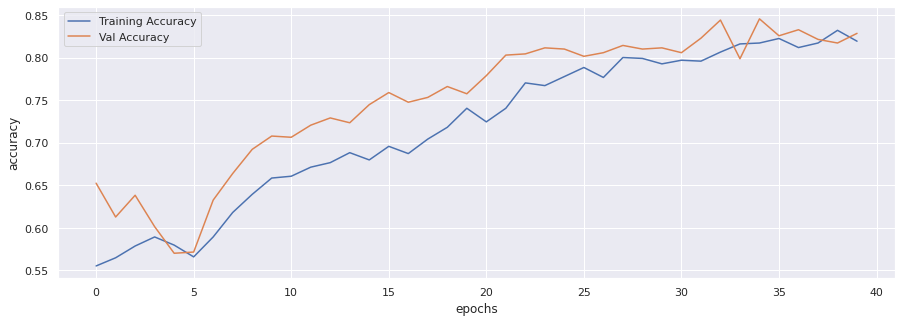

In [38]:
plt.plot(history2.history["accuracy"], label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

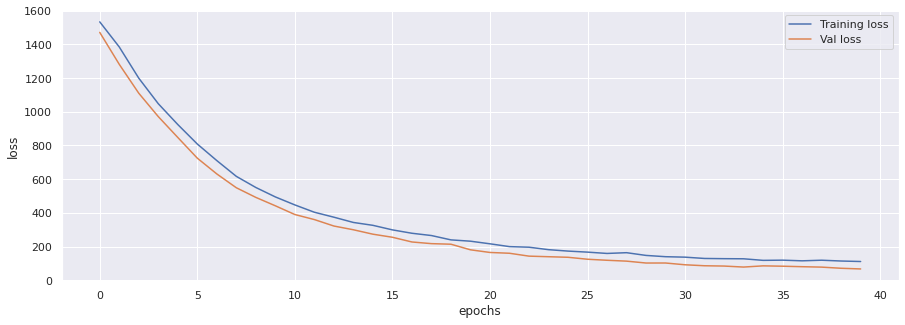

In [39]:
plt.plot(history2.history["loss"], label="Training loss")
plt.plot(history2.history["val_loss"], label="Val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [40]:
test_preds = model2.predict(X2_test)
test_preds

23/23 [==============================] - 1s 5ms/step


array([[ 0.24811989, 49.690857  , 21.621399  ,  0.        ],
       [ 1.7215468 , 50.09172   ,  3.5806487 ,  0.        ],
       [38.73781   ,  5.7776155 , 28.825094  , 23.733227  ],
       ...,
       [ 1.3810707 , 20.284483  ,  2.1085222 , 30.703636  ],
       [ 0.7917362 , 68.06968   , 50.842583  ,  0.        ],
       [35.36504   ,  9.352841  , 34.276836  , 23.920357  ]],
      dtype=float32)

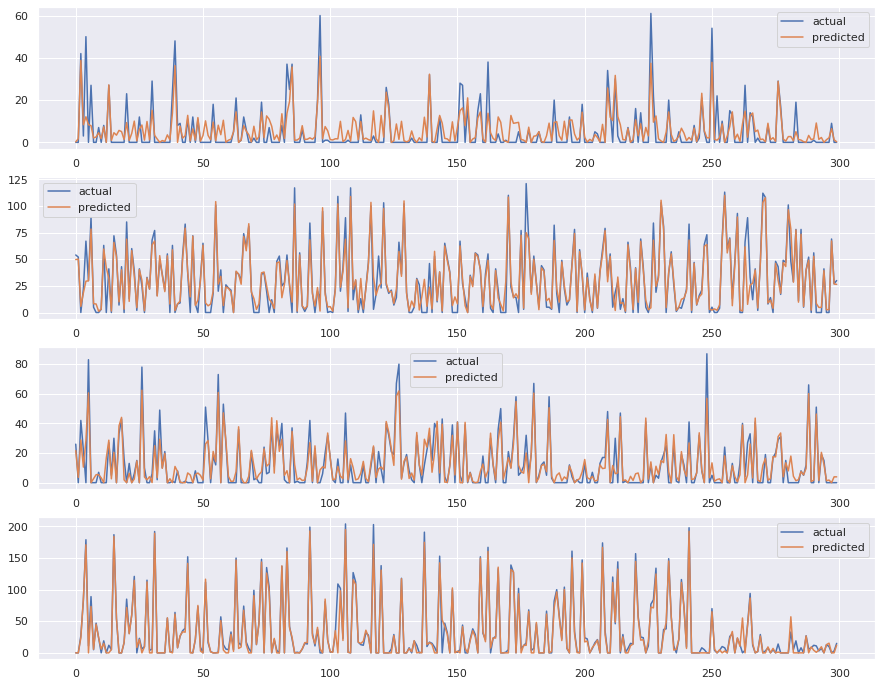

In [41]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:300, i], label="actual")
  ax[i].plot(test_preds[:300, i], label="predicted")
  ax[i].legend()

# Save the model 💾

In [42]:
save_model(model2, "model2.tflite")